## Working with the IRIS dataset
1. Load the IRIS dataset (you can find it hereLinks to an external site.)
2. Select one pair of the numerical variables and plot them using a scatter plot. Make use of the `sns.lmplot()` to create the following lines:
- One for each group separately
- One overall regardless of groups
3. Create a scatterplot of the same (or different) pair of variables. Add a second legend which will show thew number of datapoints in each category.

In [92]:
# load libraries that i will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [111]:
# load the iris dataset
dfiris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
dfiris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [112]:
# viewing our columns
dfiris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [113]:
# viewing our data types to pick columns to plot
dfiris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

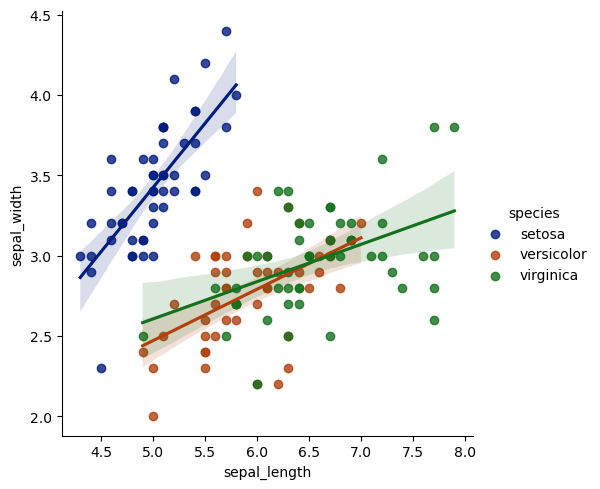

In [114]:
# plot scatter plot with regression lines one for each group of species deep
sns.lmplot(data=dfiris, x='sepal_length', y='sepal_width', hue='species', palette='dark')
plt.show()

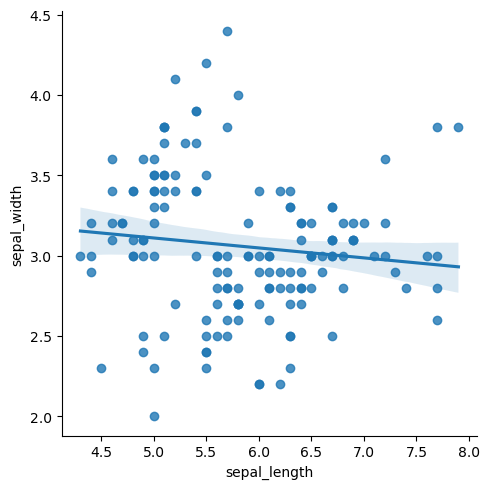

In [115]:
# plotting a scatter plot with one regression line overal regardless of the species group
sns.lmplot(data=dfiris, x='sepal_length', y='sepal_width')
plt.show()

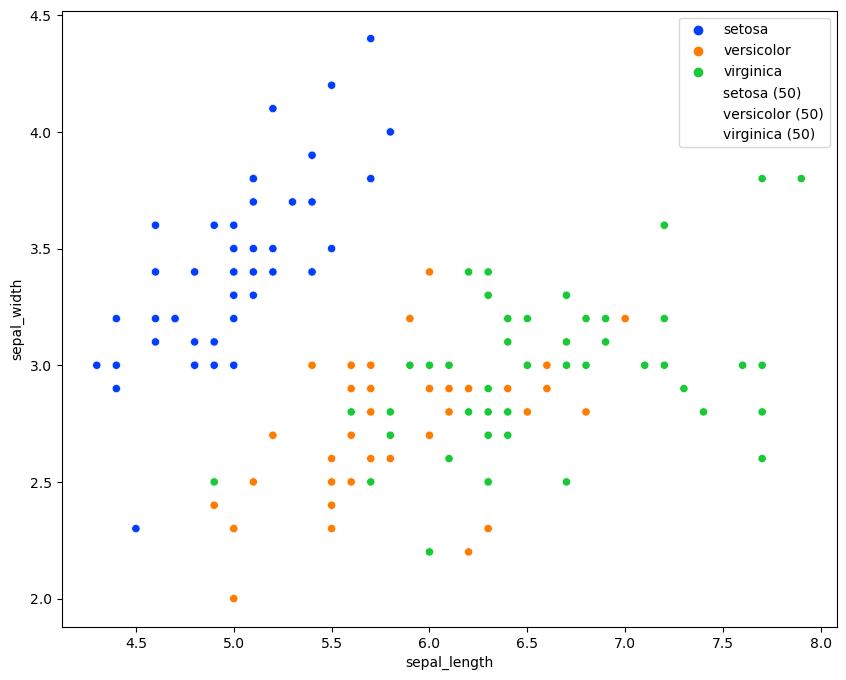

In [116]:
# Create a scatterplot of the same (or different) pair of variables. Add a second legend which will show thew number of datapoints in each category.
plt.figure(figsize=(10, 8))

sns.scatterplot(data=dfiris, x='sepal_length', y='sepal_width', hue='species', palette='bright')

# Count for data points in each species
counts = dfiris['species'].value_counts()

# creating a second custom legend for counts
for i, species in enumerate(counts.index):
    plt.scatter([], [], label=f'{species} ({counts.iloc[i]})', alpha=0.0)

# Show legend
plt.legend()

plt.show()

## Creating insights from visualisations
Your objective is to use Seaborn to create a visualization that will help identify the top 3 factors that contribute the most to the success of a movie (measured by its IMDB rating). You will need to perform exploratory data analysis on the dataset, manipulate and preprocess the data as necessary, and create a final visualization that clearly conveys your findings.

1. Load the "IMDB Top 1000 Movies" dataset into a Pandas DataFrame. You can find the dataset (and some more information about it) hereLinks to an external site..
2. Perform any necessary data cleaning and preprocessing to ensure that the dataset is ready for analysis.
3. Use Seaborn to create a set of exploratory visualizations that help you understand the structure and relationships in the data.
4. Identify the top 3 factors that are most strongly correlated with a movie's IMDB rating.

### Load and View dataset

In [117]:
# load the dataset
df = pd.read_csv("IMDB top 1000.csv")
df.head()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
0,0,1. The Shawshank Redemption (1994),R,142 min,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M"
1,1,2. The Godfather (1972),R,175 min,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M"
2,2,3. The Dark Knight (2008),PG-13,152 min,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M"
3,3,4. The Godfather: Part II (1974),R,202 min,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M"
4,4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201 min,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M"


In [118]:
df.tail()

,Unnamed: 0,Title,Certificate,Duration,Genre,Rate,Metascore,Description,Cast,Info
995,995,398. Scent of a Woman (1992),R,156 min,Drama,8.0,NaN,A prep school student needing money agrees to ...,"Director: Martin Brest | Stars: Al Pacino, Chr...","Votes: 256,515 | Gross: $63.90M"
996,996,399. Aladdin (1992),G,90 min,"Animation, Adventure, Comedy",8.0,86.0,A kindhearted street urchin and a power-hungry...,"Directors: Ron Clements, John Musker | Stars: ...","Votes: 367,489 | Gross: $217.35M"
997,997,400. JFK (1991),R,189 min,"Drama, History, Thriller",8.0,72.0,New Orleans District Attorney Jim Garrison dis...,"Director: Oliver Stone | Stars: Kevin Costner,...","Votes: 139,634 | Gross: $70.41M"
998,998,301. Nights of Cabiria (1957),Not Rated,110 min,Drama,8.1,NaN,A waifish prostitute wanders the streets of Ro...,Director: Federico Fellini | Stars: Giulietta ...,"Votes: 42,160 | Gross: $0.75M"
999,999,302. Throne of Blood (1957),Not Rated,110 min,"Drama, History",8.1,NaN,"A war-hardened general, egged on by his ambiti...",Director: Akira Kurosawa | Stars: Toshirô Mifu...,"Votes: 45,579"


In [119]:
# let us view the column names and data types and count to look for available null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1000 non-null   int64  
 1   Title        1000 non-null   object 
 2   Certificate  973 non-null    object 
 3   Duration     1000 non-null   object 
 4   Genre        1000 non-null   object 
 5   Rate         1000 non-null   float64
 6   Metascore    712 non-null    float64
 7   Description  1000 non-null   object 
 8   Cast         1000 non-null   object 
 9   Info         1000 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 78.2+ KB


### Data Cleaning

In [121]:
df.drop('Unnamed: 0',axis=1,  inplace=True)
df.columns

Index(['Title', 'Certificate', 'Duration', 'Genre', 'Rate', 'Metascore',
       'Description', 'Cast', 'Info'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1000 non-null   object 
 1   Certificate  973 non-null    object 
 2   Duration     1000 non-null   object 
 3   Genre        1000 non-null   object 
 4   Rate         1000 non-null   float64
 5   Metascore    712 non-null    float64
 6   Description  1000 non-null   object 
 7   Cast         1000 non-null   object 
 8   Info         1000 non-null   object 
dtypes: float64(2), object(7)
memory usage: 70.4+ KB


Since duration is object let us change column name to Duration (min then delete 'min' in the rows and change the column to integer datatype)

In [123]:
# Rename column name
df.rename(columns={'Duration': 'Duration(minutes)'}, inplace=True)
# Confirm renamed column
df.columns

Index(['Title', 'Certificate', 'Duration(minutes)', 'Genre', 'Rate',
       'Metascore', 'Description', 'Cast', 'Info'],
      dtype='object')

In [124]:
# Remove min from row values of the column
df['Duration(minutes)']=df['Duration(minutes)'].str.replace(' min', ' ')
# convert data type now to numeric
df['Duration(minutes)'] = pd.to_numeric(df['Duration(minutes)'])
# confirm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1000 non-null   object 
 1   Certificate        973 non-null    object 
 2   Duration(minutes)  1000 non-null   int64  
 3   Genre              1000 non-null   object 
 4   Rate               1000 non-null   float64
 5   Metascore          712 non-null    float64
 6   Description        1000 non-null   object 
 7   Cast               1000 non-null   object 
 8   Info               1000 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 70.4+ KB


The info column has values of pple voted and gross made from the movie. We extract these info into their own columns.

In [125]:
# Function to extract votes
def extract_votes(info):
    match = re.search(r'Votes: ([\d,]+)', info)
    if match:
        return int(match.group(1).replace(',', ''))
    return None

# Function to extract gross earnings
def extract_gross(info):
    match = re.search(r'Gross: \$([\d\.]+)([MK]?)', info)
    if match:
        amount = float(match.group(1))
        multiplier = match.group(2)
        if multiplier == 'M':
            amount *= 1_000_000
        elif multiplier == 'K':
            amount *= 1_000
        return int(amount)
    return None

# Apply functions to the 'Info' column
df['Votes'] = df['Info'].apply(extract_votes)
df['Gross'] = df['Info'].apply(extract_gross)

# confirm the change
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1000 non-null   object 
 1   Certificate        973 non-null    object 
 2   Duration(minutes)  1000 non-null   int64  
 3   Genre              1000 non-null   object 
 4   Rate               1000 non-null   float64
 5   Metascore          712 non-null    float64
 6   Description        1000 non-null   object 
 7   Cast               1000 non-null   object 
 8   Info               1000 non-null   object 
 9   Votes              1000 non-null   int64  
 10  Gross              849 non-null    float64
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB
None


,Title,Certificate,Duration(minutes),Genre,Rate,Metascore,Description,Cast,Info,Votes,Gross
0,1. The Shawshank Redemption (1994),R,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...","Votes: 2,295,987 | Gross: $28.34M",2295987,28340000.0
1,2. The Godfather (1972),R,175,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,"Votes: 1,584,782 | Gross: $134.97M",1584782,134970000.0
2,3. The Dark Knight (2008),PG-13,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,"Votes: 2,260,649 | Gross: $534.86M",2260649,534860000.0
3,4. The Godfather: Part II (1974),R,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,"Votes: 1,107,253 | Gross: $57.30M",1107253,57300000.0
4,5. The Lord of the Rings: The Return of the Ki...,PG-13,201,"Action, Adventure, Drama",8.9,94.0,Gandalf and Aragorn lead the World of Men agai...,"Director: Peter Jackson | Stars: Elijah Wood, ...","Votes: 1,614,369 | Gross: $377.85M",1614369,377850000.0


In [126]:
df.drop(['Info'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1000 non-null   object 
 1   Certificate        973 non-null    object 
 2   Duration(minutes)  1000 non-null   int64  
 3   Genre              1000 non-null   object 
 4   Rate               1000 non-null   float64
 5   Metascore          712 non-null    float64
 6   Description        1000 non-null   object 
 7   Cast               1000 non-null   object 
 8   Votes              1000 non-null   int64  
 9   Gross              849 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 78.2+ KB


We can see Certificate and Metascore has some missing values. Let us check how many.

In [127]:
# Check for missing values
df.isnull().sum()

Title                  0
Certificate           27
Duration(minutes)      0
Genre                  0
Rate                   0
Metascore            288
Description            0
Cast                   0
Votes                  0
Gross                151
dtype: int64

Check percentages of missing values and deal with them in certifictae column

In [128]:
(df['Certificate'].isnull().sum() / len(df)) * 100

2.7

We could drop the missing values in Certificate since they are only 2.7% but let us do a foward fill to maintain our data count

In [129]:
df['Certificate'] = df['Certificate'].ffill()

Now check percentages of missing values and deal with them in Metascore column

In [130]:
(df['Metascore'].isnull().sum()/len(df))*100

28.799999999999997

The percentage is more than a quater hence deleting would make us lose a lot of data. We will do a  fill  missing values in metascore with mean because the column is non sequential.

In [131]:
df['Metascore'] = df['Metascore'].fillna(df['Metascore'].mean())


Next deal with the gross column.

In [132]:
(df['Gross'].isnull().sum()/len(df))*100

15.1

The percentage is slightly high. Since it's a qualitative column we will fill missing values with mean.

In [133]:
df['Gross'] = df['Gross'].fillna(df['Gross'].mean())

In [134]:
# confirm we have no more missing values
df.isnull().sum()

Title                0
Certificate          0
Duration(minutes)    0
Genre                0
Rate                 0
Metascore            0
Description          0
Cast                 0
Votes                0
Gross                0
dtype: int64

Next we check for duplicates to avoid bias in our data analysis

In [135]:
# check for duplicated data
df.duplicated().sum()

602

We have a lot of duplicated entries which could probably be multiple entries by different users who watched the same movie. However the dataset is meant to have top 1000 movies from IMDB so it's possible that the duplicates are corrupted data. So we will delete duplicated data. This greatly reduces our data to a 398 count from 1000 count.

In [136]:
df.drop_duplicates(inplace=True)
# confirm any more duplicates
df.duplicated().sum()

0

### Exploratory Visualizations

Let us start with checking out the descriptive statisticsof the quantitative columns before plotting any chart.

In [137]:
df.describe()

,Duration(minutes),Rate,Metascore,Votes,Gross
count,398.000000,398.000000,398.000000,3.980000e+02,3.980000e+02
mean,129.751256,8.214322,81.892355,3.984673e+05,7.393253e+07
std,31.324192,0.217197,8.651389,4.267651e+05,1.089833e+08
min,45.000000,8.000000,61.000000,2.528200e+04,0.000000e+00
25%,108.000000,8.100000,77.250000,6.394950e+04,3.355000e+06
50%,126.500000,8.100000,81.001404,2.183595e+05,3.733000e+07
75%,146.000000,8.300000,87.750000,6.457550e+05,7.403165e+07
max,321.000000,9.300000,100.000000,2.295987e+06,8.583700e+08


### Univariate Analysis

Plot the distribution

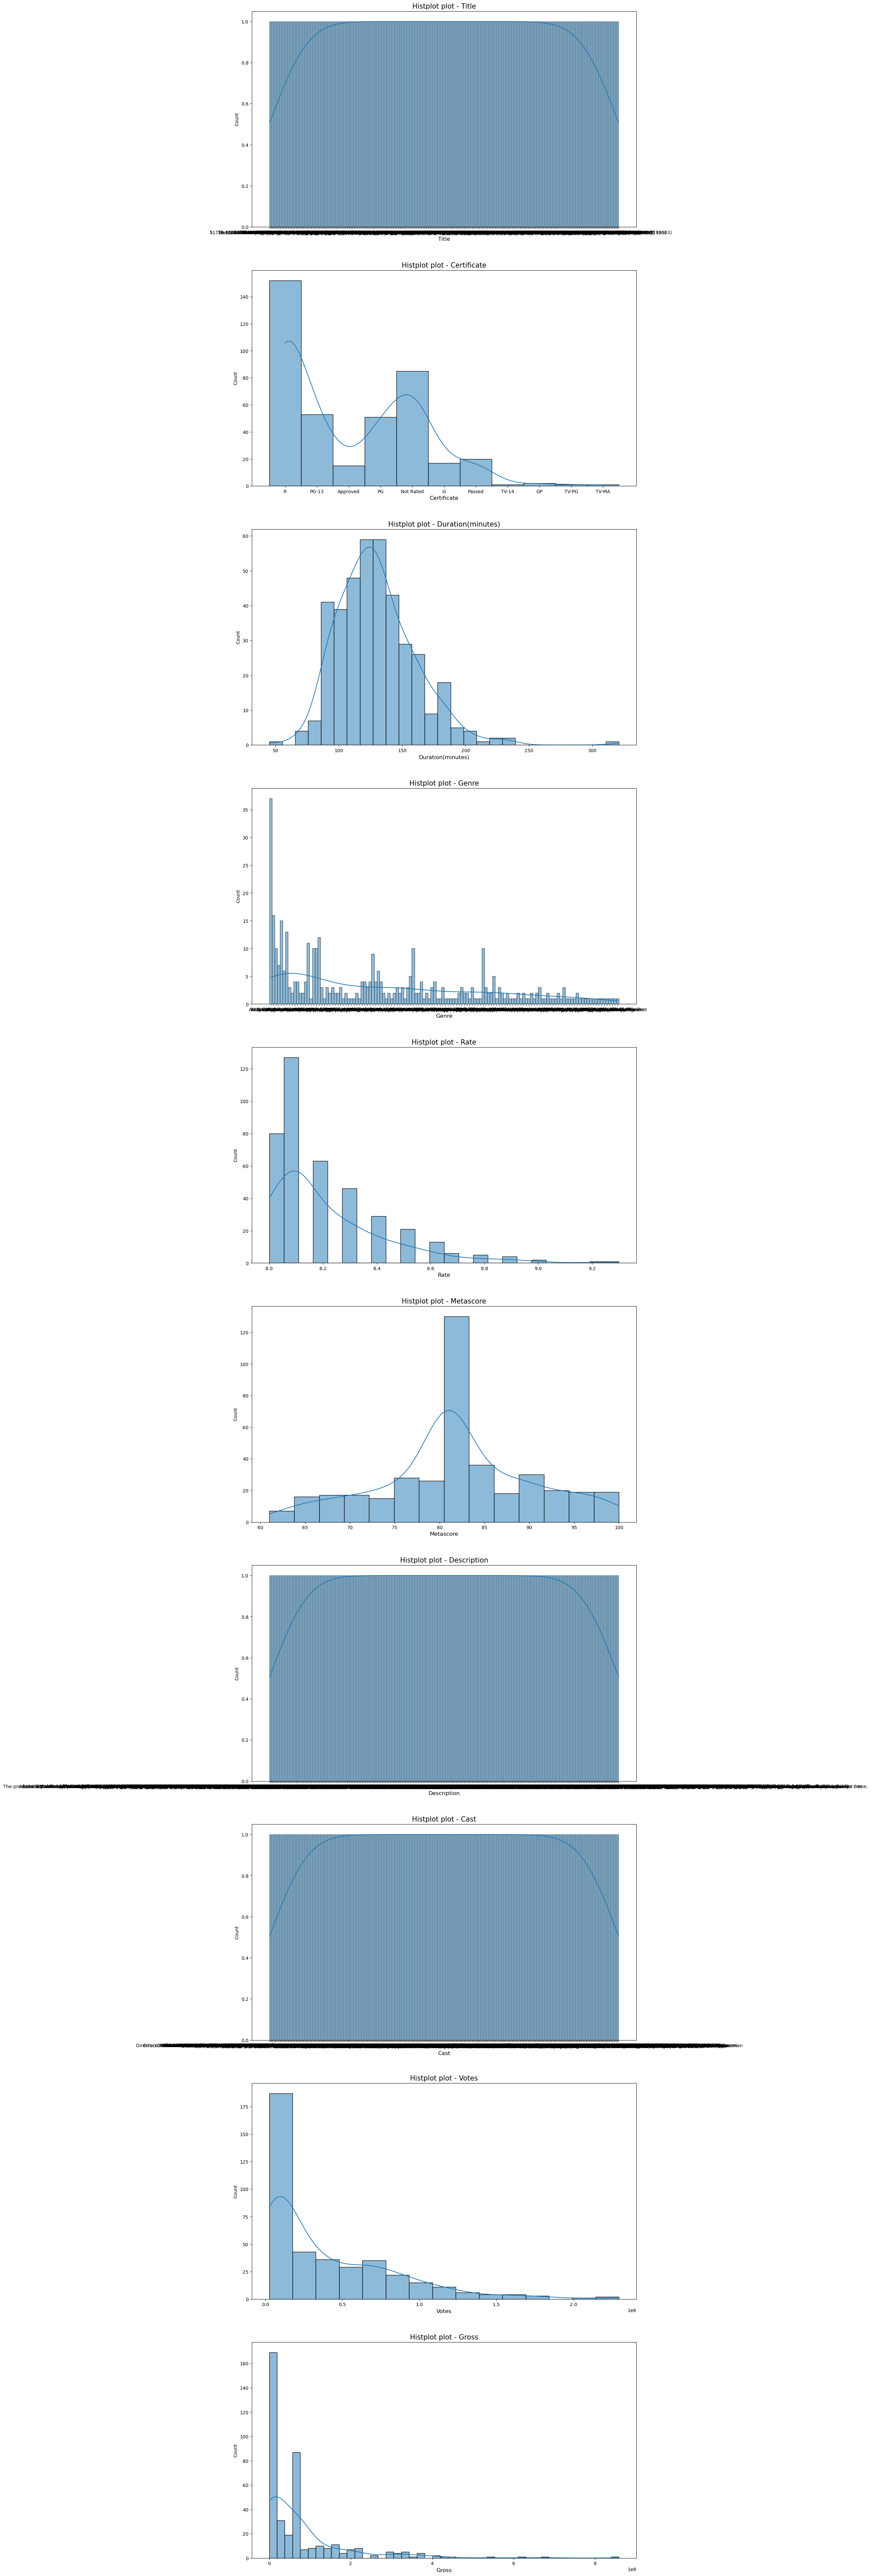

In [140]:
#checking for various distributions
fig, ax = plt.subplots(len(df.columns), figsize= (15,100))

for i, col_val in enumerate(df.columns):
  sns.histplot(df[col_val], ax= ax[i], kde=True)
  ax[i].set_title('Histplot plot - {}'.format(col_val), fontsize= 15)
  ax[i].set_xlabel(col_val, fontsize= 12)
plt.show()

In [141]:
# Numerical/Quantitative Columns to plot
num_cols = ['Rate', 'Metascore', 'Votes', 'Gross', 'Duration(minutes)']

<Figure size 1000x600 with 0 Axes>

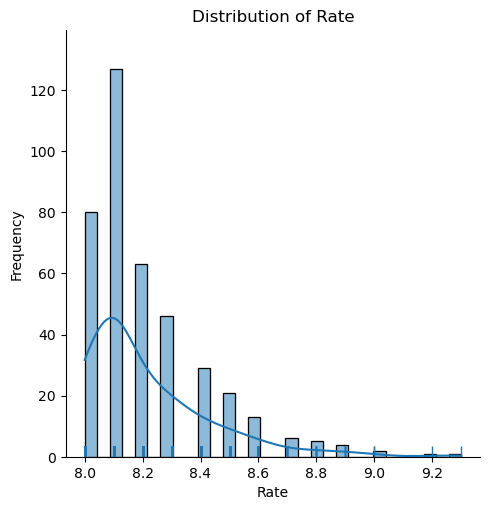

<Figure size 1000x600 with 0 Axes>

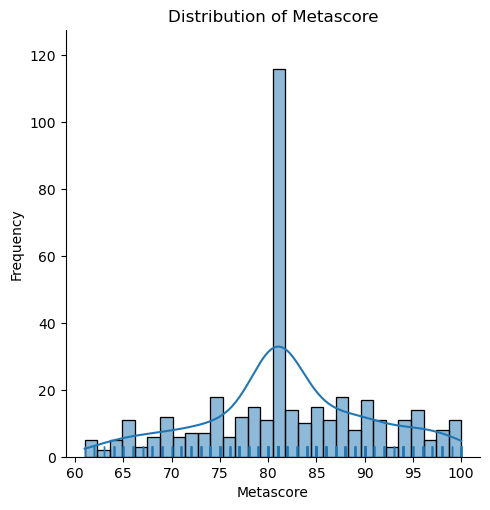

<Figure size 1000x600 with 0 Axes>

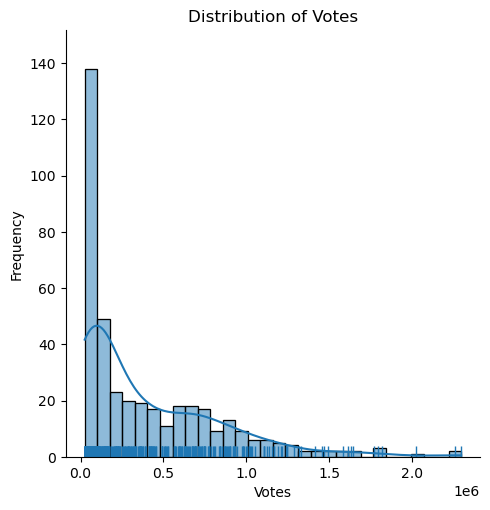

<Figure size 1000x600 with 0 Axes>

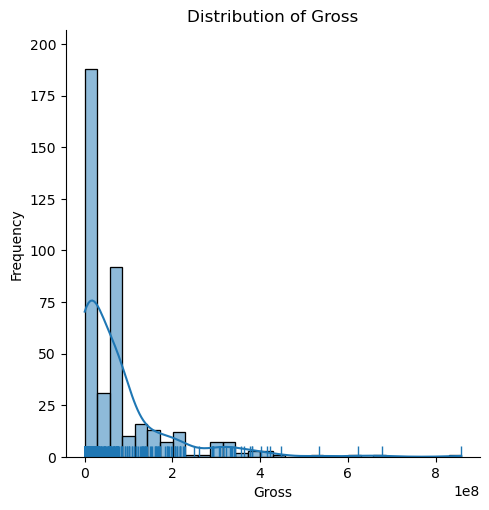

<Figure size 1000x600 with 0 Axes>

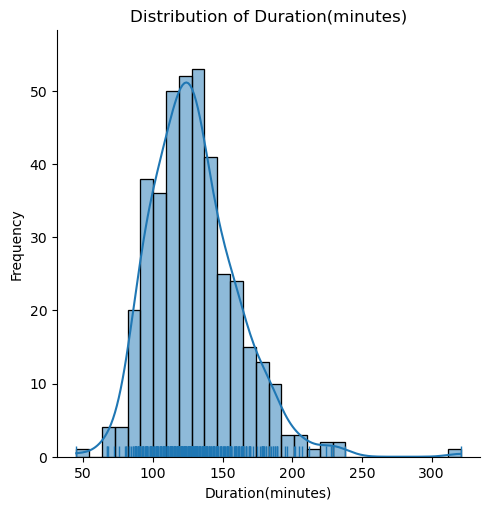

In [142]:
# Create distribution plots
for column in num_cols:
    plt.figure(figsize=(10, 6))
    sns.displot(df[column], kde=True, bins=30, rug=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Metascore and Duration are normally distributed. Gross, votes and Rate are all right skewed.

### Regression Analysis

Since rate is the column used to measure success of a movie let us plot scatter plots with regression lines of the relationship between rate and other quantitative columns

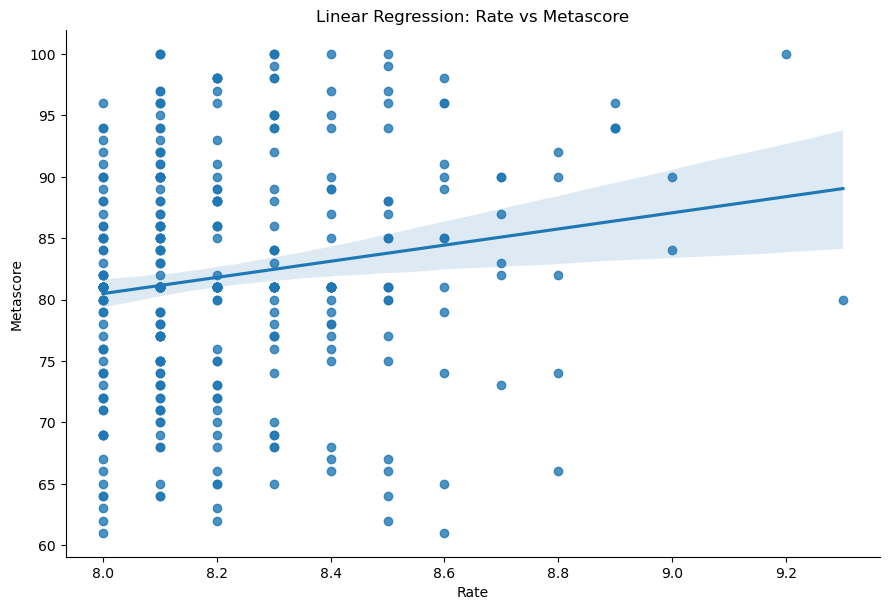

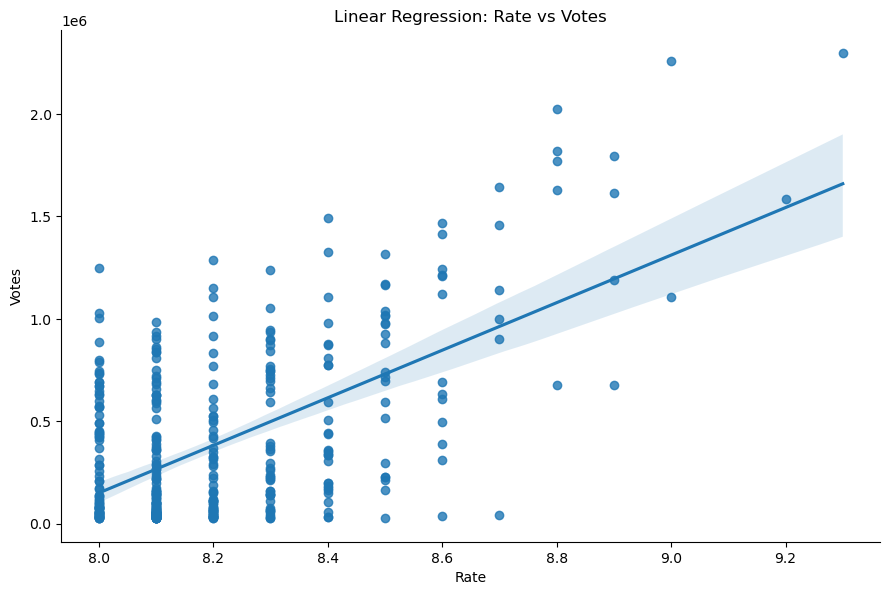

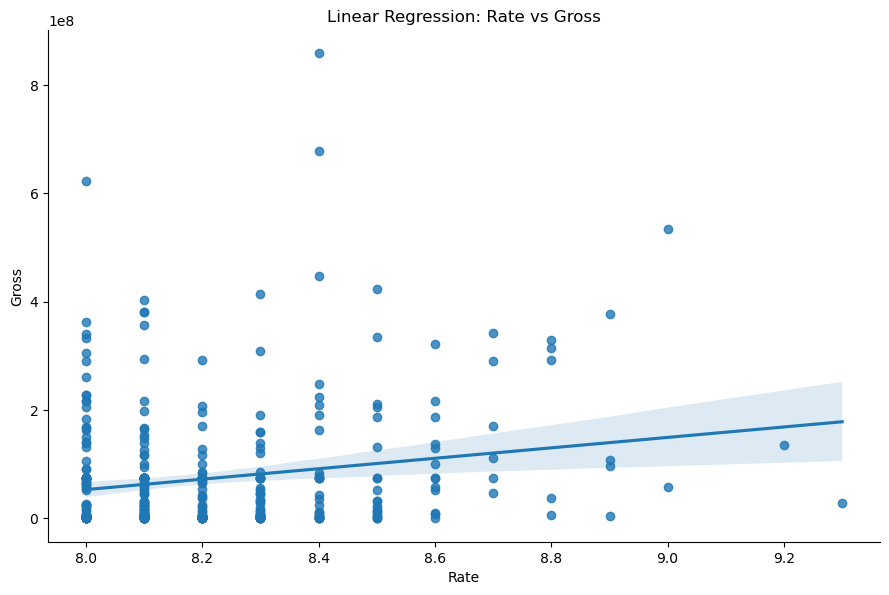

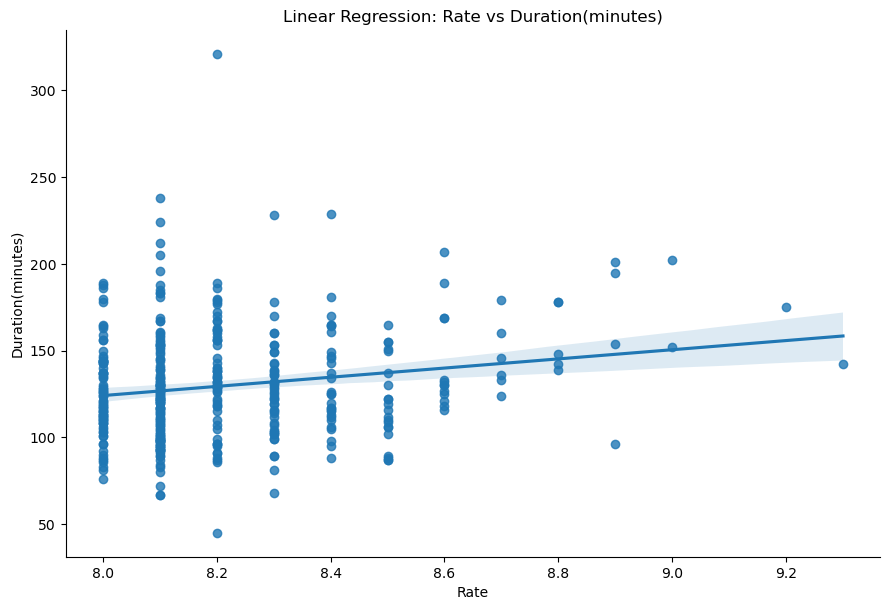

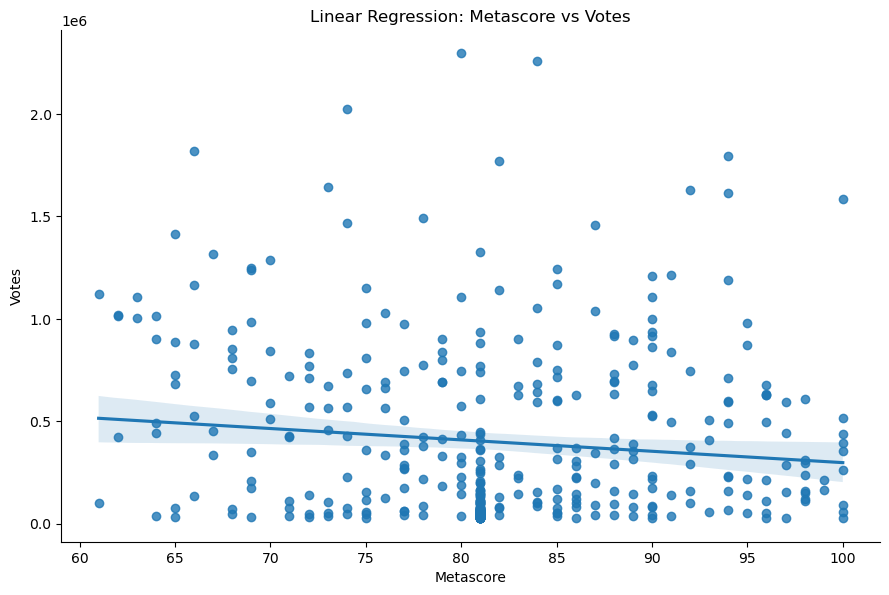

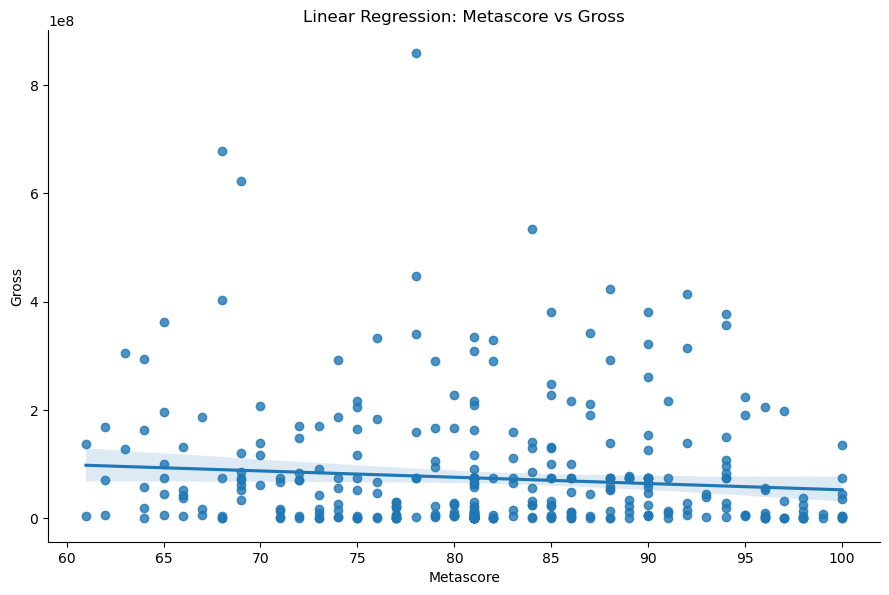

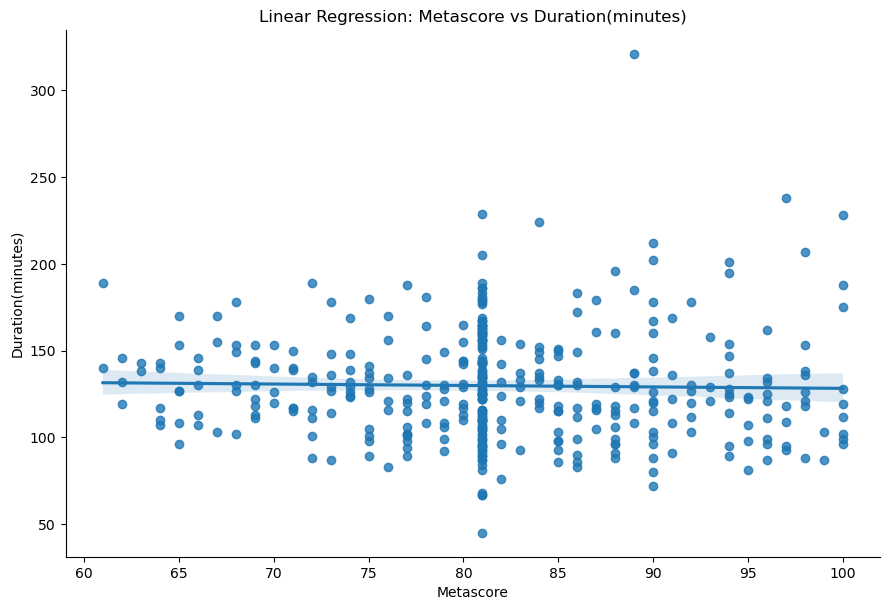

In [143]:
# Pairs of columns to plot
column_pairs = [
    ('Rate', 'Metascore'),
    ('Rate', 'Votes'),
    ('Rate', 'Gross'),
    ('Rate', 'Duration(minutes)'),
    ('Metascore', 'Votes'),
    ('Metascore', 'Gross'),
    ('Metascore', 'Duration(minutes)')
]

# Create linear regression plots
for x_col, y_col in column_pairs:
    sns.lmplot(x=x_col, y=y_col, data=df, height=6, aspect=1.5)
    plt.title(f'Linear Regression: {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

- Rate seems to have a positive linear relationship with all the attributes(Gross, Metascore, Duratiion and Votes)

- Metascore seems to have a negative linear relationship with Gross, Duration and Votes

### Categorical plots

We do not have categorical data but we will use rate as being a category and see the distribution of various rates given. We would like to see the relationship between rate and number of votes.

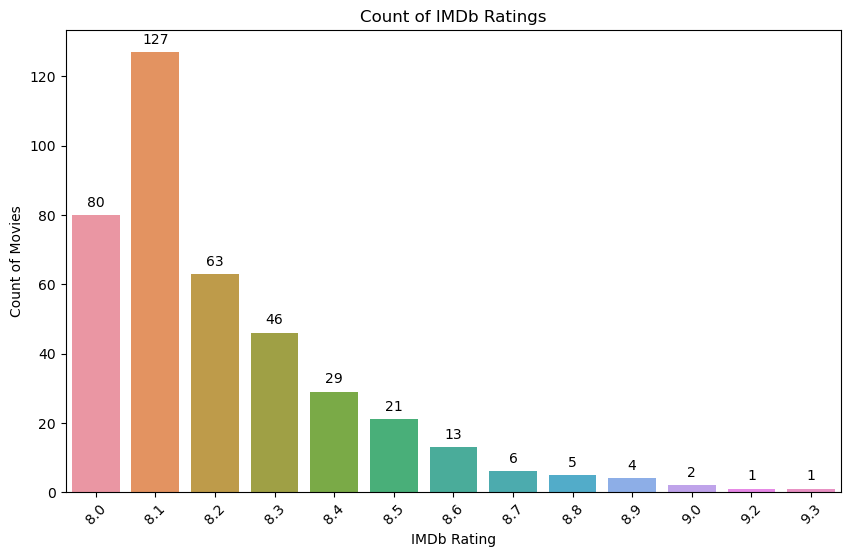

In [145]:
# Plot the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Rate', data=df)

plt.title('Count of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Count of Movies')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Show the plot
plt.show()

- We see the most popular rating is 8.1. The highest rating given is 9.3 and the lowest is 8.0. The best rated movies are the least in number.

Plot the unique rates against the sum of votes for that rate and compare

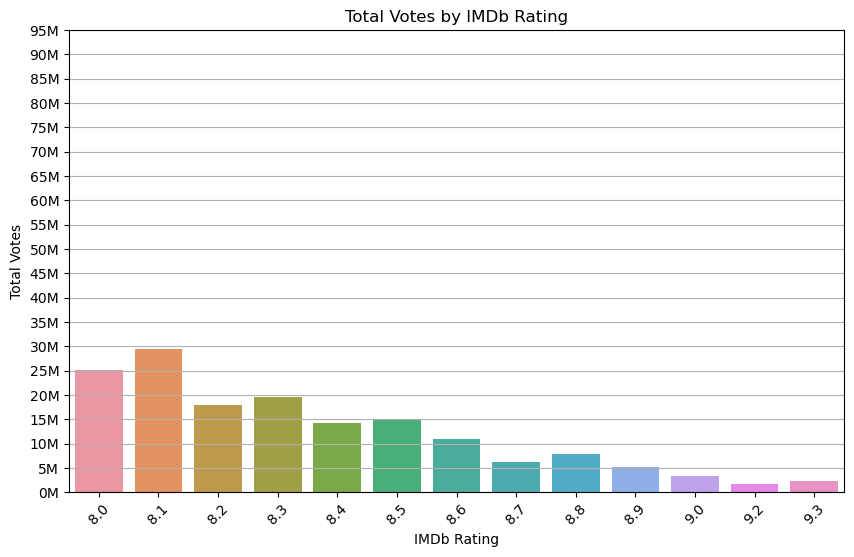

In [146]:
# Calculate the sum of votes for each unique IMDb rating
votes_by_rate = df.groupby('Rate')['Votes'].sum().reset_index()

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plot the barplot
sns.barplot(x='Rate', y='Votes', data=votes_by_rate)


plt.title('Total Votes by IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Total Votes')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set y-axis ticks as whole numbers
plt.yticks(ticks=[i * 5000000 for i in range(20)], labels=[f'{i * 5}M' for i in range(20)])
plt.grid(axis='y')
plt.show()

- 8.1 is still leading. although 9.2 and 9.3 had the same count of movies we see 9.3 had more sum of votes.

lets view the relationship on a scatter plot. Initially we had seen that they dont seem linearly related so let's try a curve

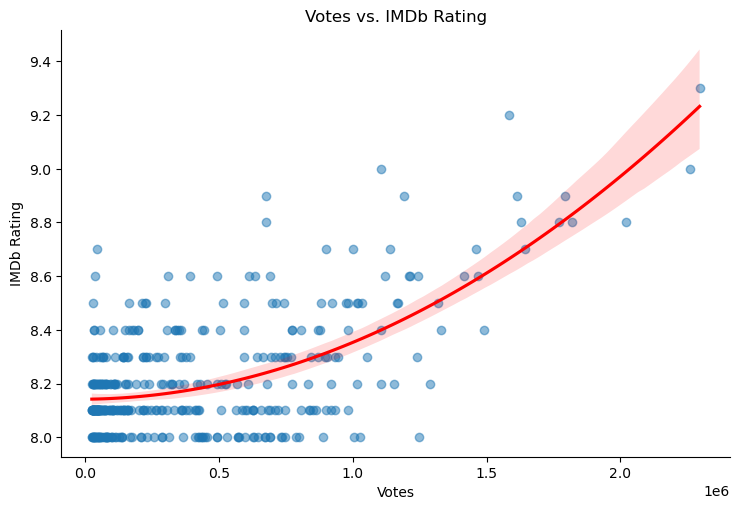

In [147]:
# lets view the relationship on a scatter plot
sns.lmplot(x='Votes', y='Rate', data=df, aspect=1.5, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'}, order=2)
plt.title('Votes vs. IMDb Rating')
plt.xlabel('Votes')
plt.ylabel('IMDb Rating')
plt.show()

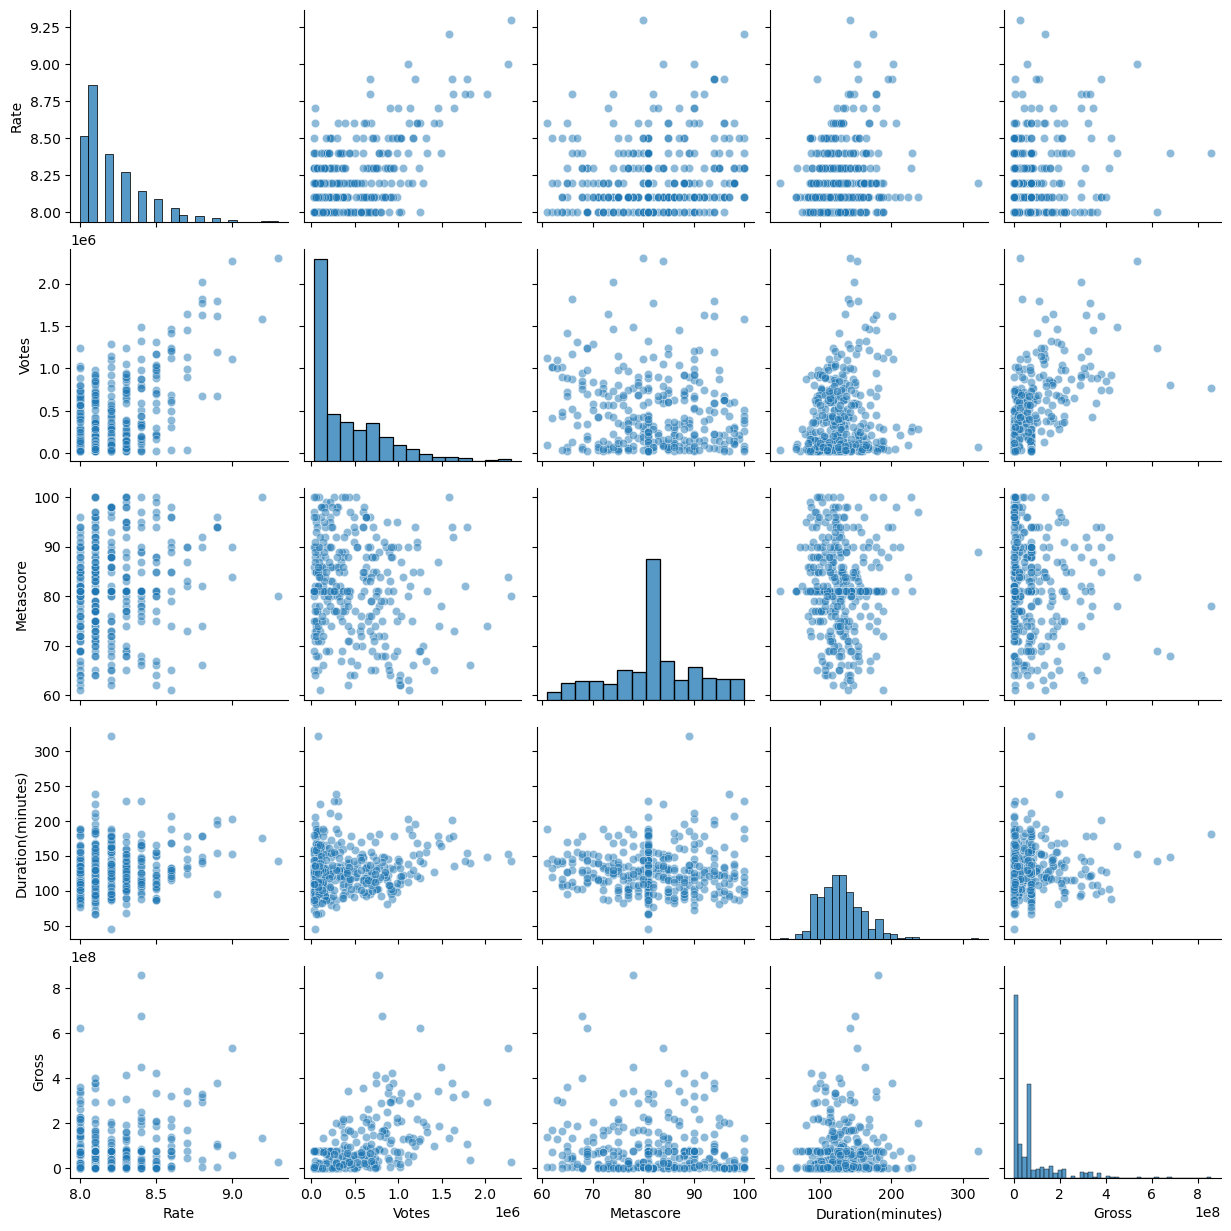

In [148]:
sns.pairplot(df, vars=['Rate','Votes', 'Metascore', 'Duration(minutes)', 'Gross'],  plot_kws={'alpha':0.5})

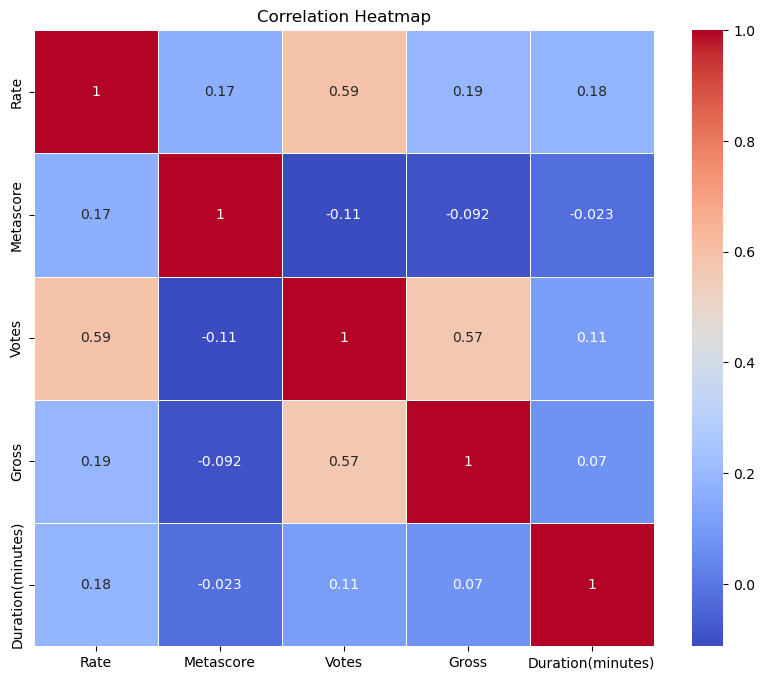

In [151]:
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm',  linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

From the heat map the top 3 positively related factors to success of a movie(rate) is Votes being the highest them Gross and duration of the movie.

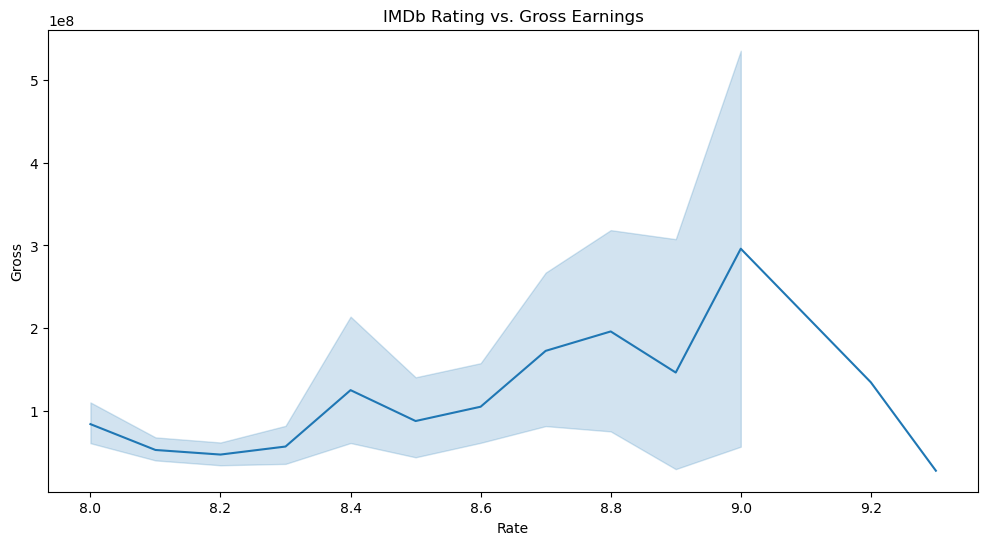

In [152]:
# Sort the DataFrame by Gross
df_sorted = df.sort_values(by='Gross')

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Rate', y='Gross', data=df_sorted)

# Set the title and labels
plt.title('IMDb Rating vs. Gross Earnings')

plt.show()

Gross does not strongly corelate to the success of a movie. However some highly rated movies had the high gross earnings

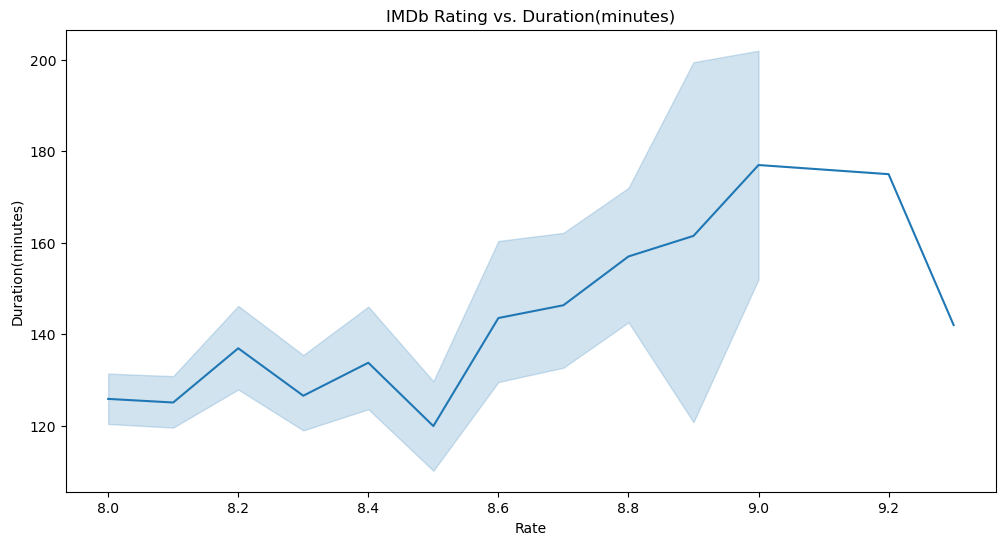

In [153]:
# Sort the DataFrame by Duration
df_sorted = df.sort_values(by='Duration(minutes)')

# Plot the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Rate', y='Duration(minutes)', data=df_sorted, )

# Set the title and labels
plt.title('IMDb Rating vs. Duration(minutes)')

plt.show()

High rated movies seem to be long movies. Although the last movie which is the highest rated reduced in duration.

Certificate and genre seem to be interesting to consider analysing against the success of a movie.

In [154]:
high_Rated_above9= df.query('Rate >= 9')
high_Rated_above9

,Title,Certificate,Duration(minutes),Genre,Rate,Metascore,Description,Cast,Votes,Gross
0,1. The Shawshank Redemption (1994),R,142,Drama,9.3,80.0,Two imprisoned men bond over a number of years...,"Director: Frank Darabont | Stars: Tim Robbins,...",2295987,28340000.0
1,2. The Godfather (1972),R,175,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Director: Francis Ford Coppola | Stars: Marlon...,1584782,134970000.0
2,3. The Dark Knight (2008),PG-13,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Director: Christopher Nolan | Stars: Christian...,2260649,534860000.0
3,4. The Godfather: Part II (1974),R,202,"Crime, Drama",9.0,90.0,The early life and career of Vito Corleone in ...,Director: Francis Ford Coppola | Stars: Al Pac...,1107253,57300000.0


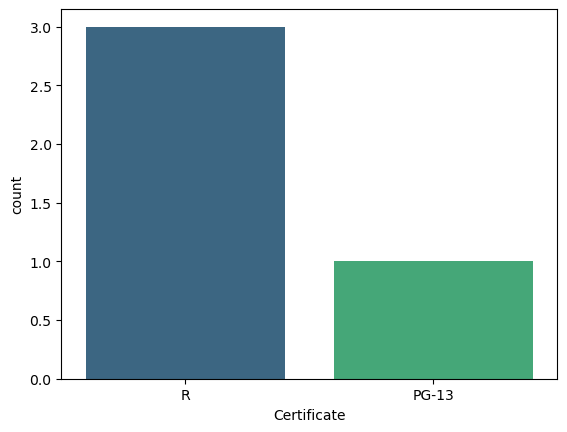

In [155]:
sns.countplot(x='Certificate', data=high_Rated_above9, palette='viridis')
plt.show()

The R. certificate belongs to all above 9 rated movies. and PG-13 for 9 rated movies.

In [156]:
high_Rated_above85= df.query('Rate >= 8.5')

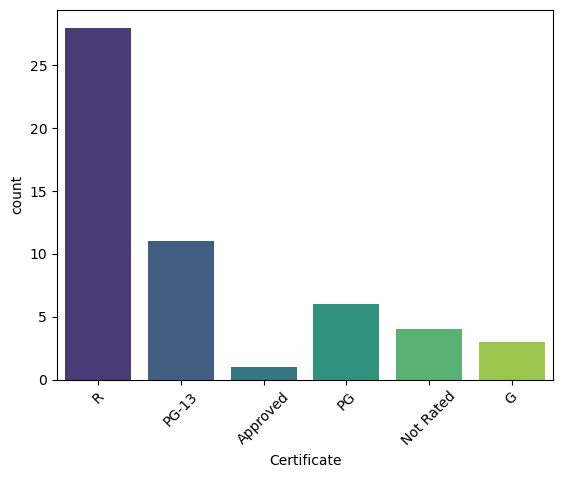

In [157]:
sns.countplot(x='Certificate', data=high_Rated_above85, palette='viridis')
plt.xticks(rotation=45)
plt.show()

- We notice R, PG13 and PG leading for highly rated movies

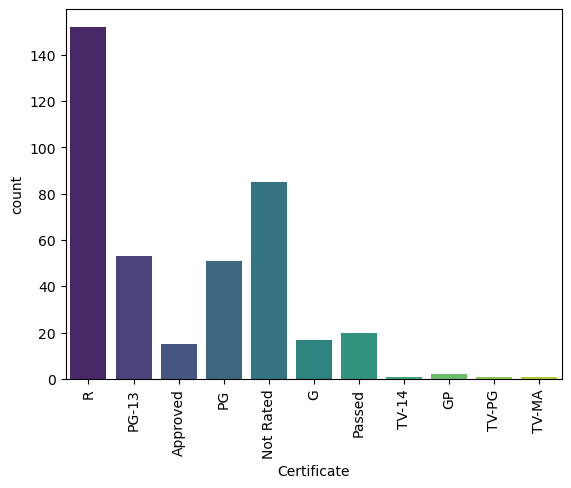

In [158]:
sns.countplot(x='Certificate', data=df, palette='viridis')
plt.xticks(rotation=90)
plt.show()

Generally  R, PG13 and PG and the not rated are leading for all movies and successful movies.

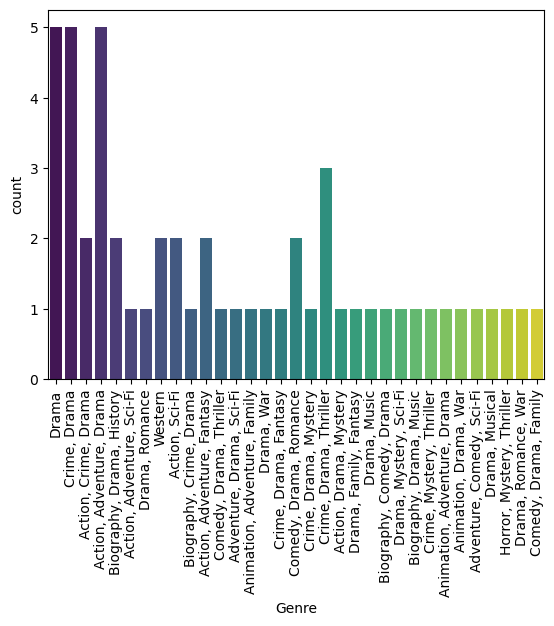

In [159]:
sns.countplot(x='Genre', data=high_Rated_above85, palette='viridis')
plt.xticks(rotation=90)
plt.show()

In all top rated movies, drama is involved, followed by crime. So we could say including crime and drama in the movie contributes to the success of the movie

### Success factors

- From our visualizations we can see that quantitatively, top 3 positively related factors to success of a movie(rate) is Votes being the highest then Gross and duration of the movie. 
- Categorically according to genre, crime and drama are common in top rated movies.
- Categorically according to certificate, R, PG13 and PG and the not rated are popular also in top rated movies.
- There arent so many top rated movies. Most movies are on the lower bracket of ratings
- Votes is distinctively most likely to contribute to the success of a movie.